## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [117]:
!pip install torch torchvision

## Task 2 : Loading VGG Pretrained Model

In [5]:
!git clone https://github.com/parth1620/Project-NST.git


Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 19 (delta 2), reused 1 (delta 1), pack-reused 16
Receiving objects: 100% (19/19), 3.30 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [119]:
import torch
from torchvision import models

In [120]:
vgg = models.vgg19(pretrained=True)
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [121]:
# removing the classifier layer
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [122]:
# stopping the updation of weights and biases
for parameter in vgg.parameters():
  parameter.requires_grad_(False)

In [123]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [124]:
device

device(type='cuda')

In [125]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [126]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):

  # size = 0
  image = Image.open(img_path).convert('RGB')
  # print(image.size)
  if max(image.size) > max_size:
    size = max_size
    # print(f'If statement: {size}')
  else:
    size = max(image.size)

  img_transform = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
    ])
  # print(size)
  image = img_transform(image)
  # print(image)
  image = image.unsqueeze(0)
  # print(image)
  return image


In [127]:
content_p = preprocess(img_path='/content/Project-NST/content11.jpg')
style_p = preprocess(img_path='/content/Project-NST/style12.jpg')

In [128]:
print(content_p.shape,'\n',style_p.shape)

torch.Size([1, 3, 259, 345]) 
 torch.Size([1, 3, 625, 500])


In [129]:
content_p = content_p.to(device)
style_p = style_p.to(device)

## Task 4 : Deprocess image

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1, 2, 0)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0,1)

  return image

In [131]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

In [132]:
print(f'The Shape of content_d: {content_d.shape}\nThe Shape of style_d: {style_d.shape}')

The Shape of content_d: (259, 345, 3)
The Shape of style_d: (625, 500, 3)


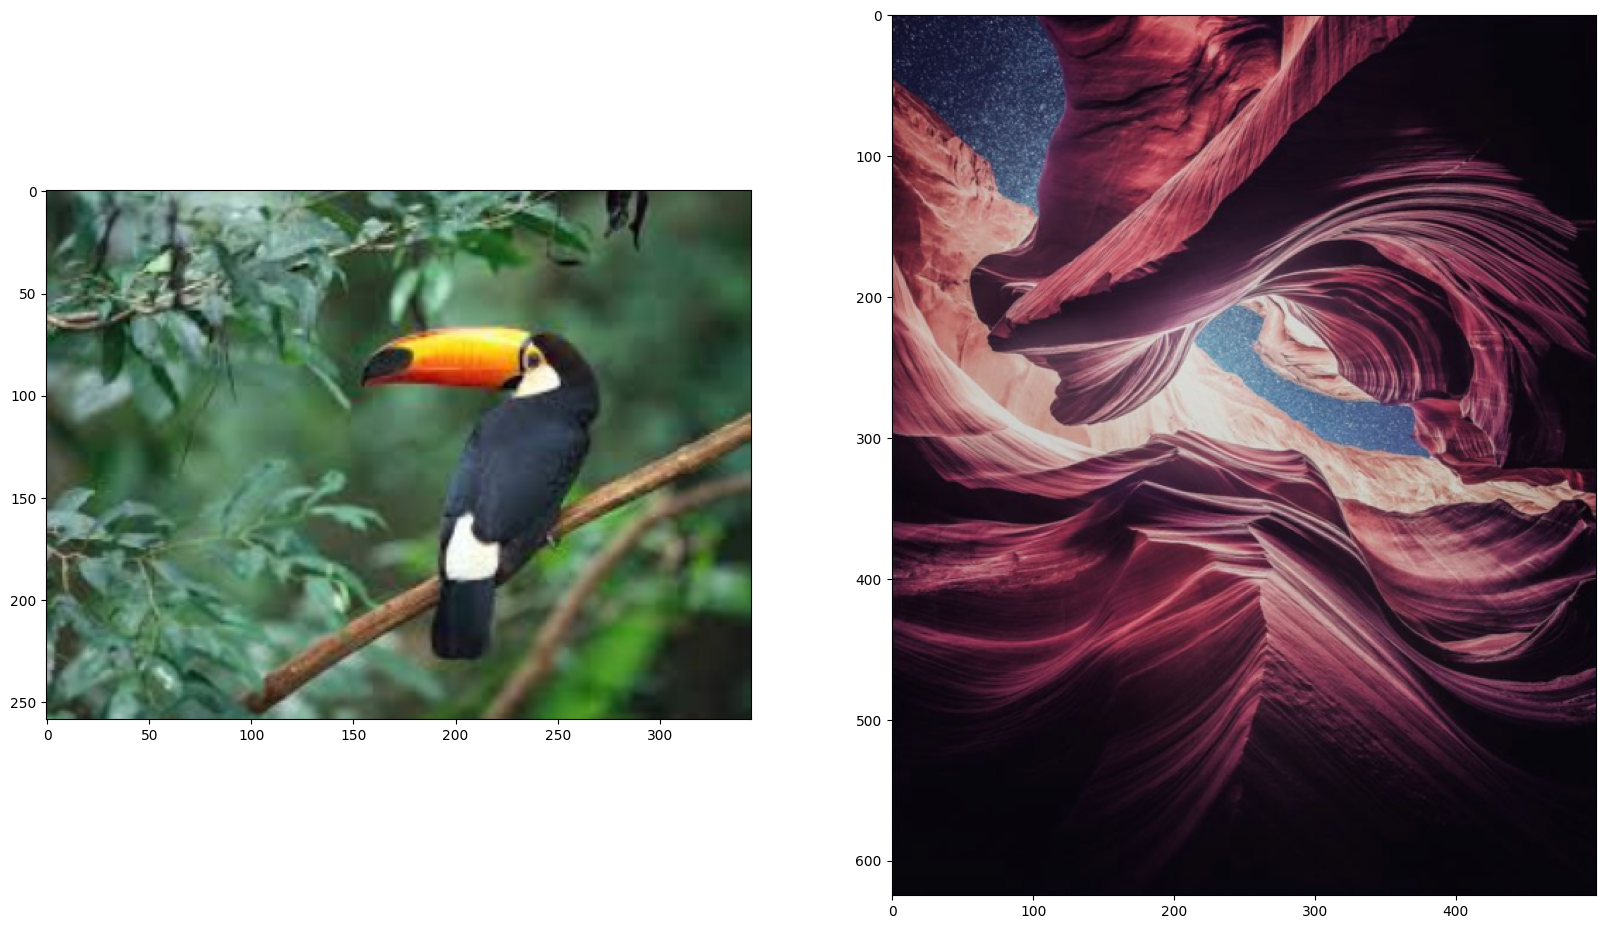

In [133]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 20))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [134]:
def get_features(model, image):
  layers = {
      '0': 'conv1_1',
      '5':'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',
      '28':'conv5_1'
  }
  x = image
  features = {}
  for name, layer in model._modules.items():
    x = layer(x)


    if name in layers:
      features[layers[name]] = x
  return features

In [135]:
content_f = get_features(vgg, content_p)
style_f = get_features(vgg, style_p)

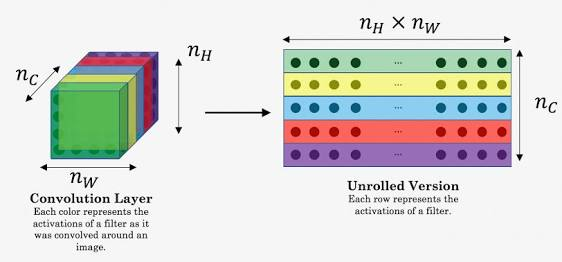

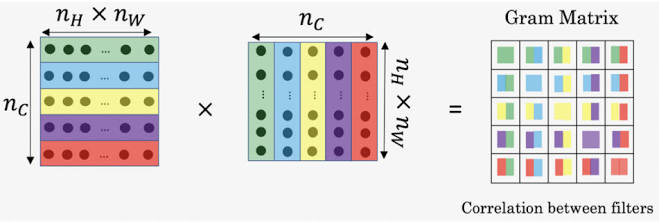

In [136]:
def gram_matrix(tensor):
  b,c,h,w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [137]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [138]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)
  return loss

In [139]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2,
}

In [140]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h, w = target_f.shape
    layer_loss = style_weights[layer] + torch.mean((target_gram - style_gram) ** 2)
    loss += layer_loss / (c*h*w)

  return loss

In [148]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(model=vgg, image=target)
print(f'Content Loss:', content_loss(target_f["conv4_2"], content_f["conv4_2"]))
print('Style Loss:', style_loss(style_weights, target_f, style_grams))

Content Loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss: tensor(2980.0081, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [142]:
from torch import optim
optimizer = optim.Adam([target], lr=0.001)
alpha = 1
beta = 1e5
epochs = 6000
show_res = 500

In [143]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [144]:
!pip install tqdm
from tqdm.auto import tqdm

In [145]:
results = []
for epoch in tqdm(range(epochs)):
  target_f = get_features(model=vgg, image=target) # Checked It's working...

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2']) # Checked It's working...

  s_loss = style_loss(style_weights, target_f,style_grams)

  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if epoch % show_res == 0:
    print(f'EPOCH {epoch}-----------\nTotal Loss is: {t_loss}')
    results.append(deprocess(target.detach()))


  0%|          | 0/6000 [00:00<?, ?it/s]

EPOCH 0-----------
Total Loss is: 298000800.0
EPOCH 500-----------
Total Loss is: 121171344.0
EPOCH 1000-----------
Total Loss is: 77084976.0
EPOCH 1500-----------
Total Loss is: 46980208.0
EPOCH 2000-----------
Total Loss is: 31515944.0
EPOCH 2500-----------
Total Loss is: 24746040.0
EPOCH 3000-----------
Total Loss is: 20873094.0
EPOCH 3500-----------
Total Loss is: 18229612.0
EPOCH 4000-----------
Total Loss is: 16256137.0
EPOCH 4500-----------
Total Loss is: 14676535.0
EPOCH 5000-----------
Total Loss is: 13371921.0
EPOCH 5500-----------
Total Loss is: 12259199.0


ValueError: ignored

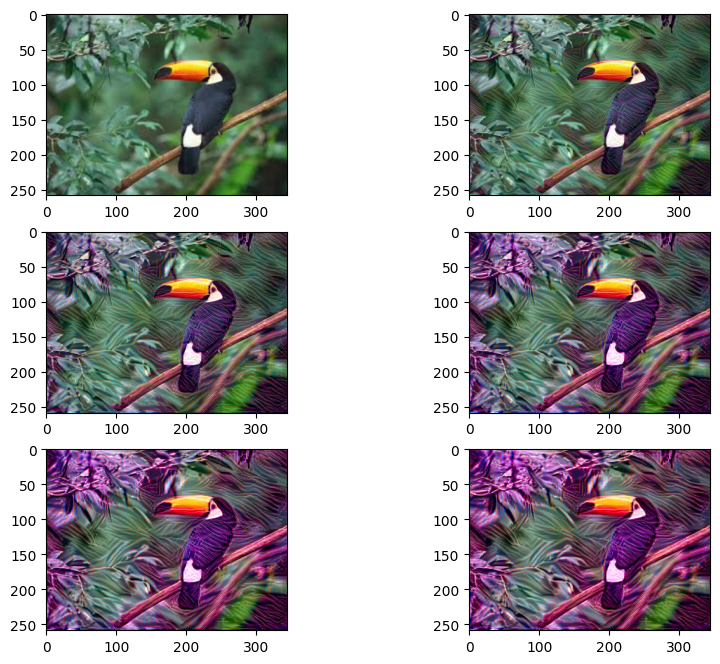

In [147]:
plt.figure(figsize=(10, 8))
for i in range(len(results)):
  plt.subplot(3, 2, i+1)
  plt.show(results[i])
plt.show()

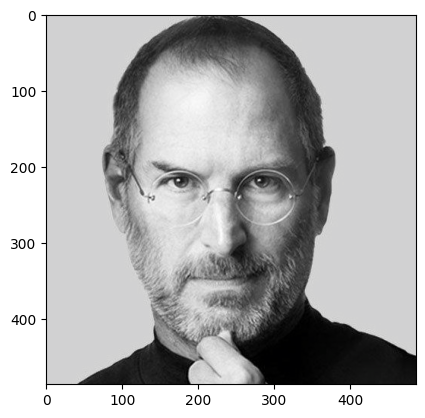